In [2]:
#data loading
import pandas as pd
filename="/content/gapminder.csv"
a=pd.read_csv(str(filename))

print(a)

       rownames              country  year  infant_mortality  life_expectancy  \
0             1              Albania  1960            115.40            62.87   
1             2              Algeria  1960            148.20            47.50   
2             3               Angola  1960            208.00            35.98   
3             4  Antigua and Barbuda  1960               NaN            62.97   
4             5            Argentina  1960             59.87            65.39   
...         ...                  ...   ...               ...              ...   
10540     10541   West Bank and Gaza  2016               NaN            74.70   
10541     10542              Vietnam  2016               NaN            75.60   
10542     10543                Yemen  2016               NaN            64.92   
10543     10544               Zambia  2016               NaN            57.10   
10544     10545             Zimbabwe  2016               NaN            61.69   

       fertility  populatio

In [3]:
print(a.head())

   rownames              country  year  infant_mortality  life_expectancy  \
0         1              Albania  1960            115.40            62.87   
1         2              Algeria  1960            148.20            47.50   
2         3               Angola  1960            208.00            35.98   
3         4  Antigua and Barbuda  1960               NaN            62.97   
4         5            Argentina  1960             59.87            65.39   

   fertility  population           gdp continent           region  
0       6.19   1636054.0           NaN    Europe  Southern Europe  
1       7.65  11124892.0  1.382815e+10    Africa  Northern Africa  
2       7.32   5270844.0           NaN    Africa    Middle Africa  
3       4.43     54681.0           NaN  Americas        Caribbean  
4       3.11  20619075.0  1.083223e+11  Americas    South America  


In [4]:
print(a.tail())

       rownames             country  year  infant_mortality  life_expectancy  \
10540     10541  West Bank and Gaza  2016               NaN            74.70   
10541     10542             Vietnam  2016               NaN            75.60   
10542     10543               Yemen  2016               NaN            64.92   
10543     10544              Zambia  2016               NaN            57.10   
10544     10545            Zimbabwe  2016               NaN            61.69   

       fertility  population  gdp continent              region  
10540        NaN         NaN  NaN      Asia        Western Asia  
10541        NaN         NaN  NaN      Asia  South-Eastern Asia  
10542        NaN         NaN  NaN      Asia        Western Asia  
10543        NaN         NaN  NaN    Africa      Eastern Africa  
10544        NaN         NaN  NaN    Africa      Eastern Africa  


In [5]:
##Checking for null values
a.isna().sum()

rownames               0
country                0
year                   0
infant_mortality    1453
life_expectancy        0
fertility            187
population           185
gdp                 2972
continent              0
region                 0
dtype: int64

In [6]:
fill_int_colums={3,5,6,7}
for i in fill_int_colums:
  a.iloc[:,i]=a.iloc[:,i].fillna(a.iloc[:,i].mean())

In [17]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()


#transform string into int
transformColumns={1,8,9}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

       rownames  country  year  infant_mortality  life_expectancy  fertility  \
0             1        0  1960        115.400000             1742        530   
1             2        1  1960        148.200000              595        676   
2             3        2  1960        208.000000               39        643   
3             4        3  1960         55.308619             1748        354   
4             5        4  1960         59.870000             1955        221   
...         ...      ...   ...               ...              ...        ...   
10540     10541      181  2016         55.308619             2798        319   
10541     10542      180  2016         55.308619             2868        319   
10542     10543      182  2016         55.308619             1913        319   
10543     10544      183  2016         55.308619             1294        319   
10544     10545      184  2016         55.308619             1644        319   

       population   gdp  continent  reg

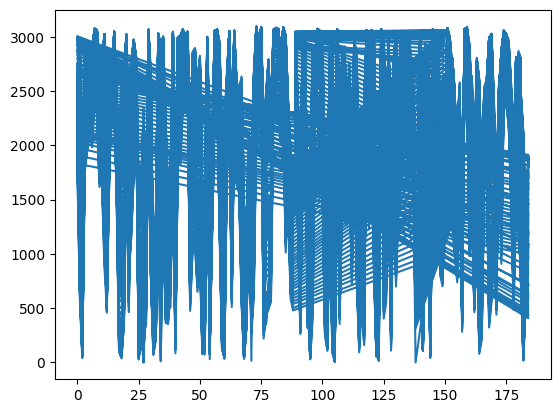

In [18]:
from matplotlib import pyplot as plt
target="life_expectancy"
index=1
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 10545 artists>

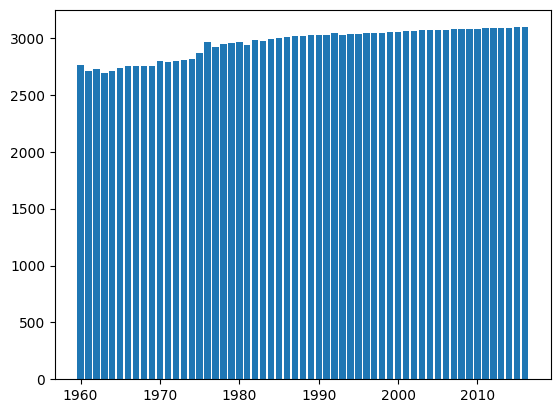

In [19]:
plt.bar(a[a.columns[2]],a[str(target)])

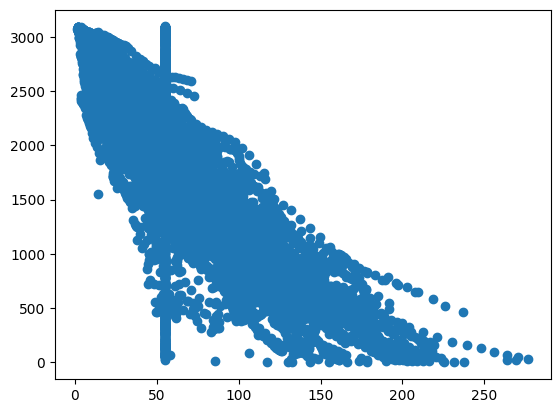

In [20]:
plt.scatter(a[a.columns[3]], a[str(target)])

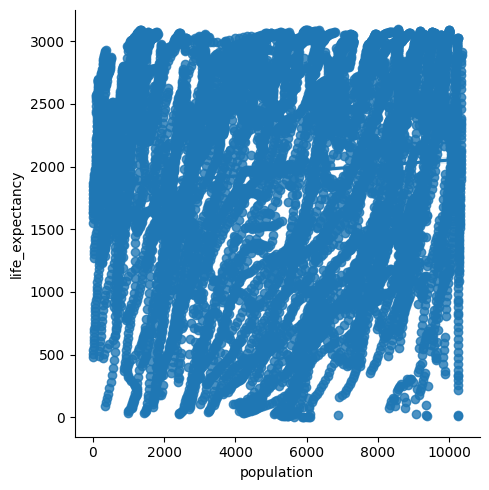

In [21]:
import seaborn as sns
#a["education"] = pd.to_numeric(a["education"])
#a["parttime"] = pd.to_numeric(a["parttime"])
sns.lmplot(x="population",y=str(target),data=a)

<Axes: xlabel='fertility', ylabel='life_expectancy'>

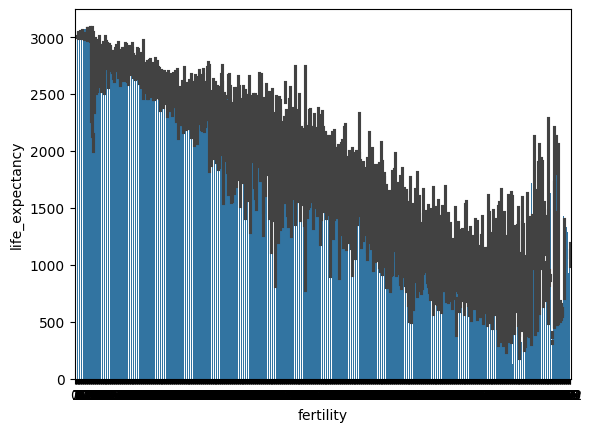

In [22]:
sns.barplot(x=a.columns[5],y=str(target),data=a)

<Axes: xlabel='country', ylabel='life_expectancy'>

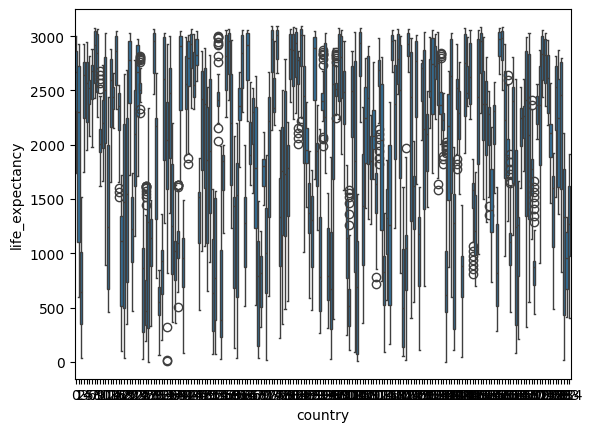

In [23]:
sns.boxplot(x=a.columns[1],y=str(target),data=a)

<ipython-input-24-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='life_expectancy', ylabel='Density'>

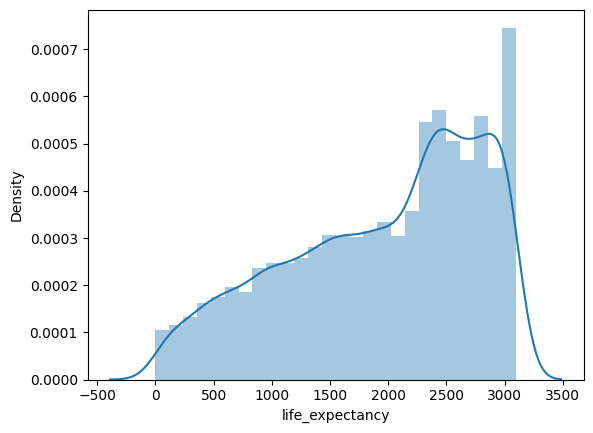

In [24]:
sns.distplot(a[str(target)])

<Axes: xlabel='country', ylabel='Density'>

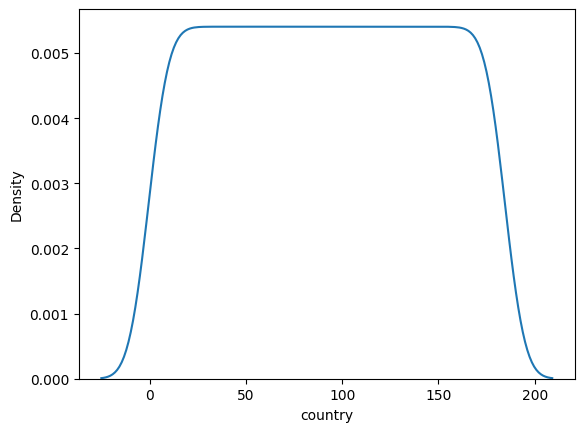

In [25]:
sns.kdeplot(a[a.columns[1]])

<Axes: xlabel='country', ylabel='Density'>

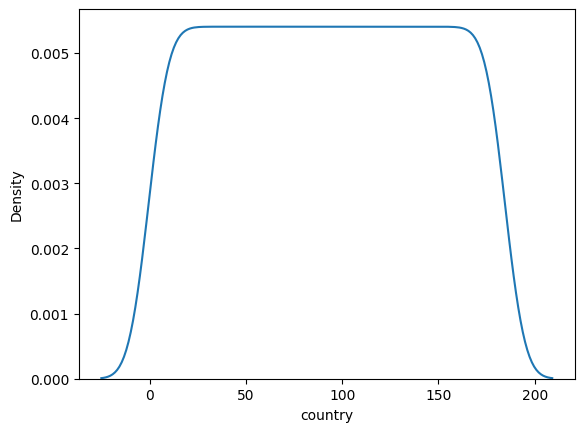

In [26]:
sns.kdeplot(a[a.columns[1]])

<Axes: xlabel='year', ylabel='count'>

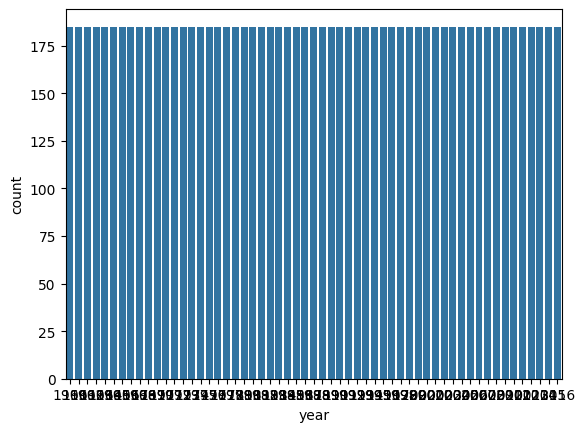

In [28]:
sns.countplot(x=a.columns[2],data=a)

<Axes: >

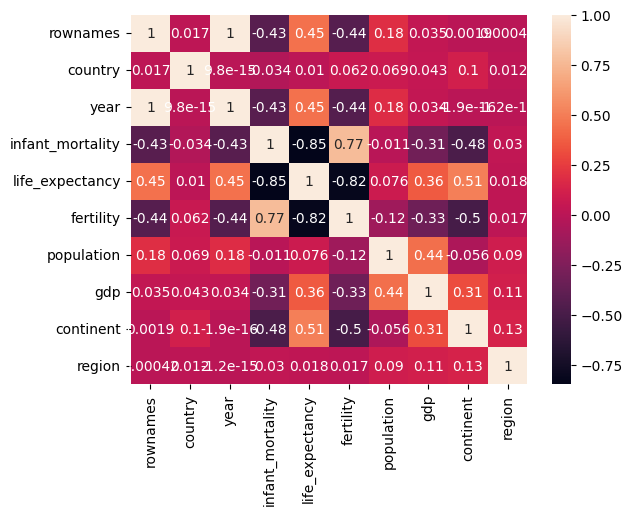

In [29]:
data=a.select_dtypes(include=np.number).corr()
sns.heatmap(data, annot=True)

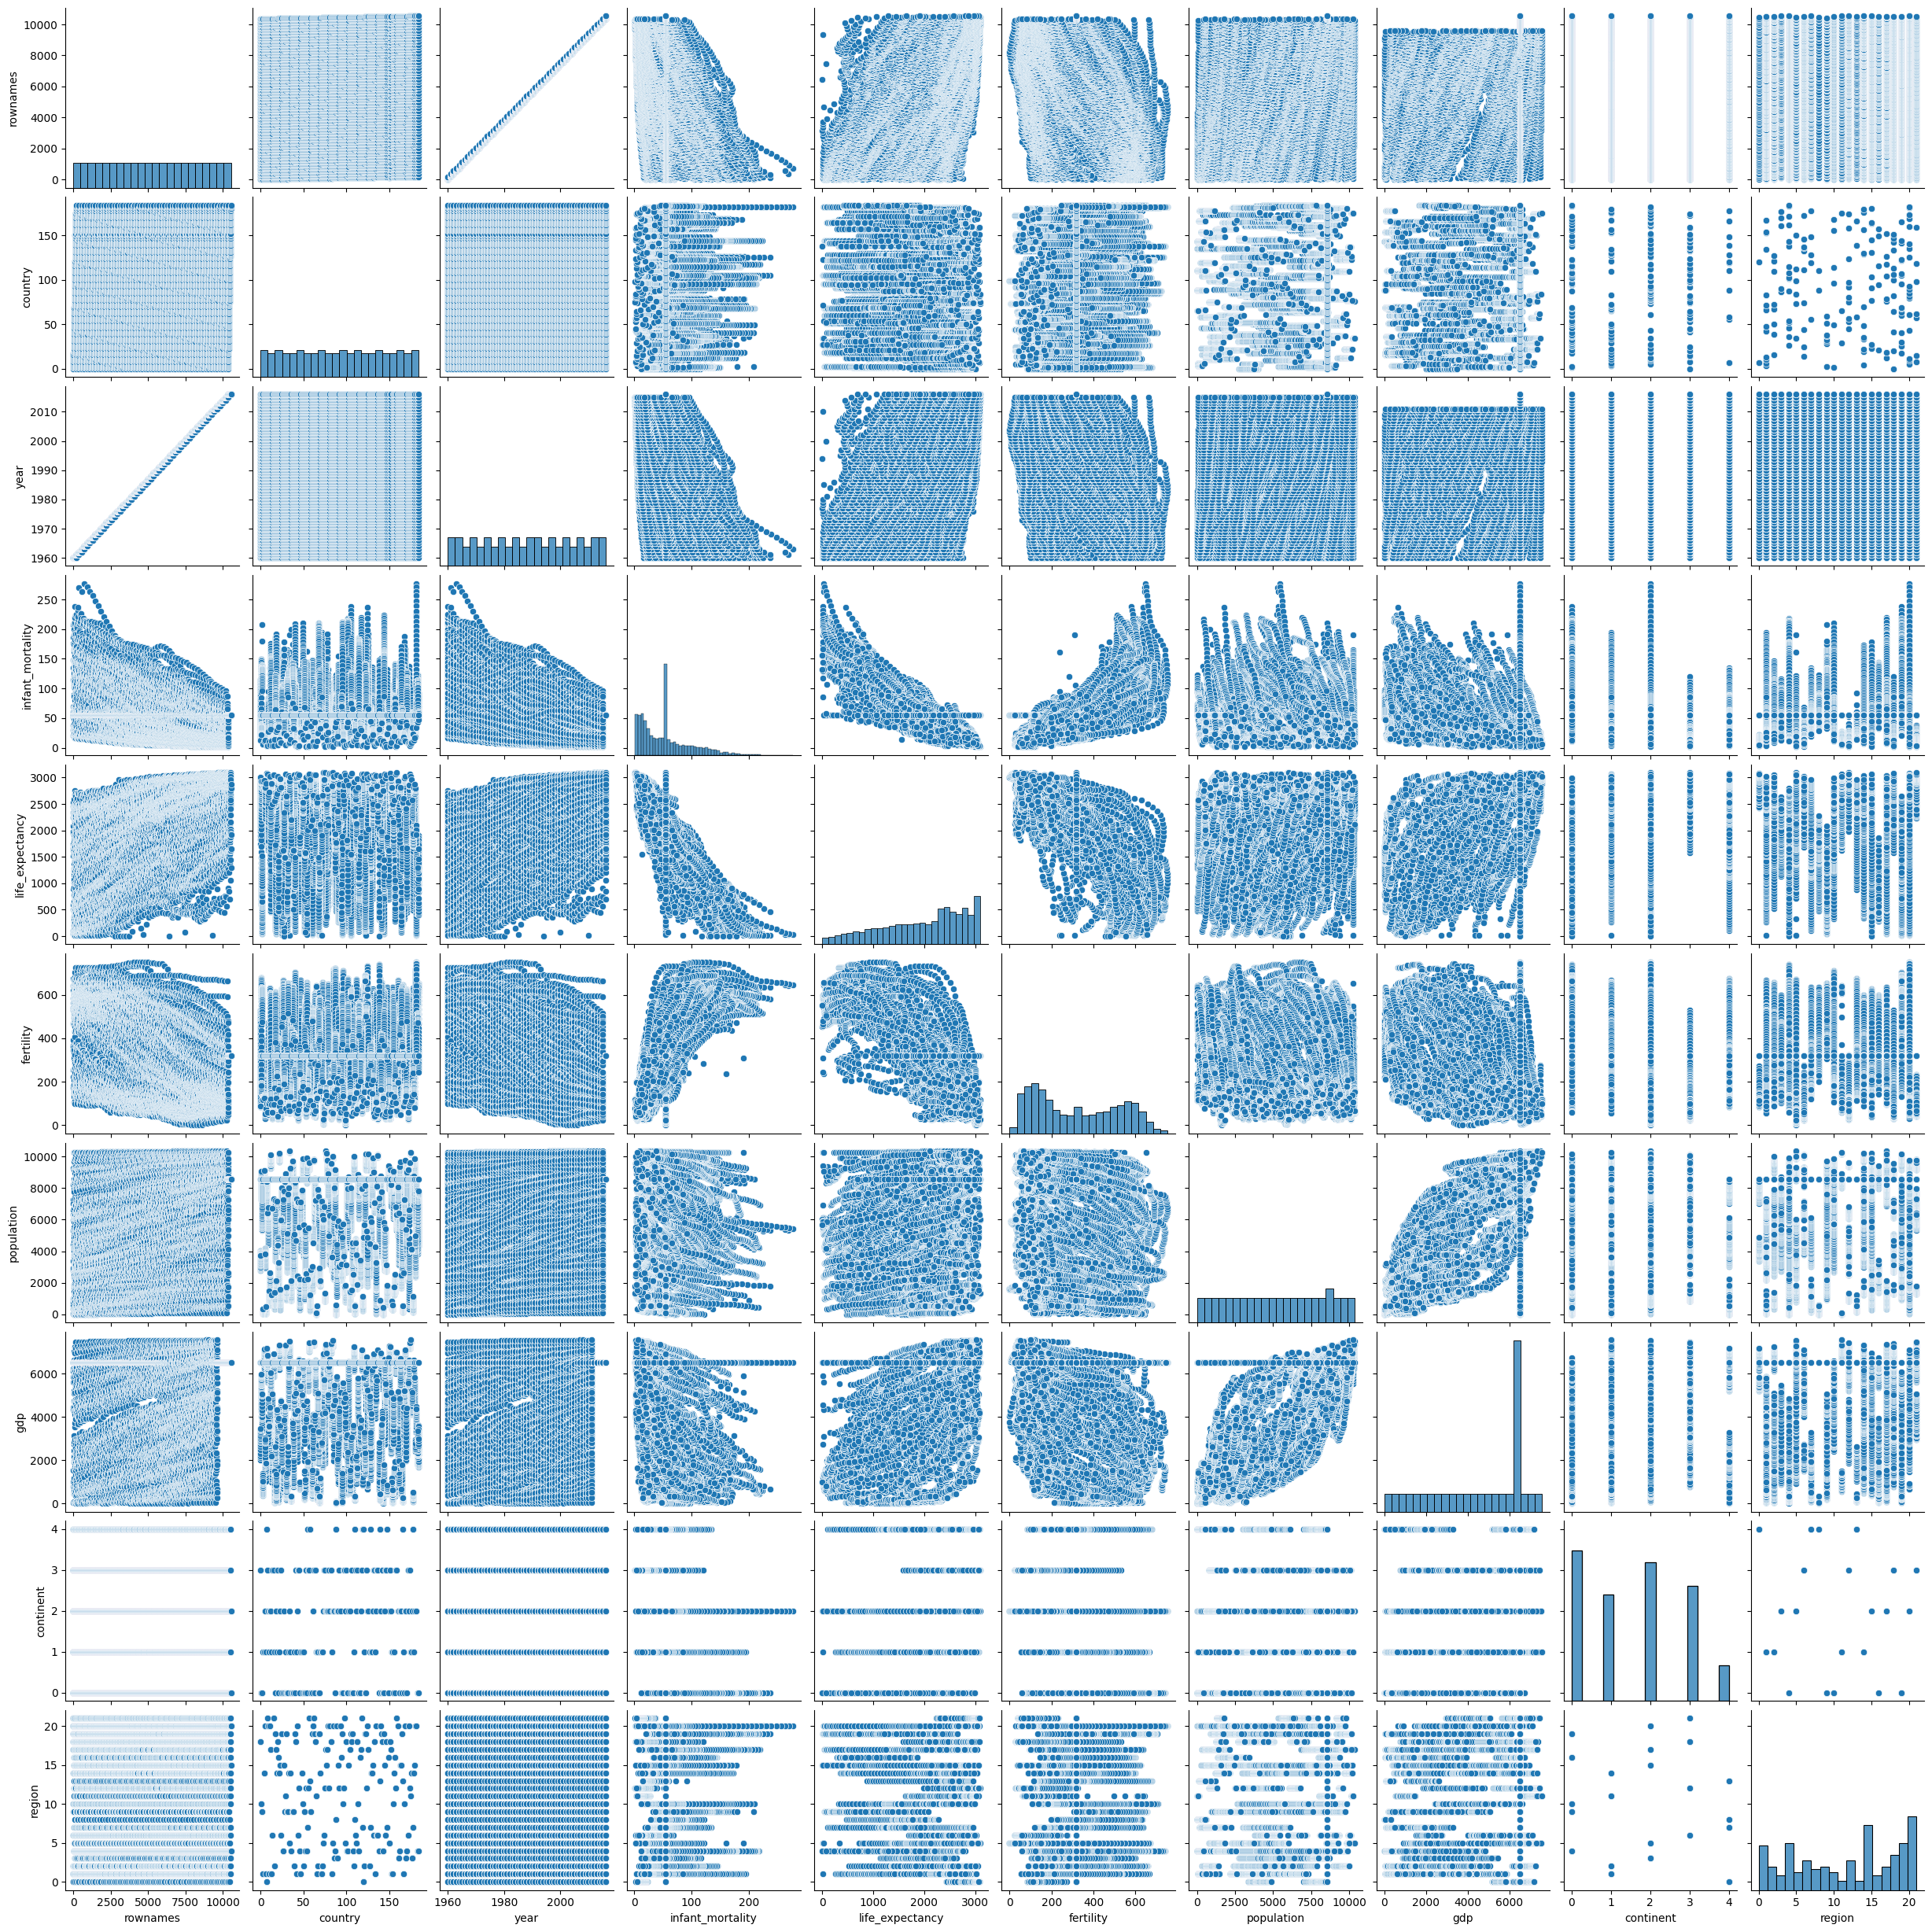

In [30]:
sns.pairplot(data=a)

In [31]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

       rownames  country  year  infant_mortality  fertility  population   gdp  \
0             1        0  1960        115.400000        530        2785  6518   
1             2        1  1960        148.200000        676        7255  4431   
2             3        2  1960        208.000000        643        5324  6518   
3             4        3  1960         55.308619        354          65  6518   
4             5        4  1960         59.870000        221        8218  6228   
...         ...      ...   ...               ...        ...         ...   ...   
10540     10541      181  2016         55.308619        319        8560  6518   
10541     10542      180  2016         55.308619        319        8560  6518   
10542     10543      182  2016         55.308619        319        8560  6518   
10543     10544      183  2016         55.308619        319        8560  6518   
10544     10545      184  2016         55.308619        319        8560  6518   

       continent  region  


In [32]:
print(y)

0        1742
1         595
2          39
3        1748
4        1955
         ... 
10540    2798
10541    2868
10542    1913
10543    1294
10544    1644
Name: life_expectancy, Length: 10545, dtype: int64


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [34]:
print(x_train)

      rownames  country  year  infant_mortality  fertility  population   gdp  \
7044      7045       14  1998              13.6         39        6915  4241   
5198      5199       18  1988             101.0        510        1703   289   
5124      5125      128  1987              68.1        413        4419  2151   
1755      1756       89  1969              56.6        644        1992  6518   
3127      3128      167  1976              38.5        239        2328  3268   
...        ...      ...   ...               ...        ...         ...   ...   
9972      9973      167  2013              19.2         90        2597  6518   
9112      9113       47  2009              28.3        172        6790  5330   
9355      9356      104  2010              11.2        144        1350  1482   
8857      8858      162  2007              51.5        470        9077  4595   
541        542      171  1962             127.3        615        6012  6518   

      continent  region  
7044         

In [35]:
print(y_train)

7044    2173
5198    1476
5124    1161
1755    2218
3127    2102
        ... 
9972    2570
9112    2763
9355    3026
8857    1445
541      530
Name: life_expectancy, Length: 8436, dtype: int64


In [36]:
print(x_test)

       rownames  country  year  infant_mortality  fertility  population   gdp  \
6578       6579      102  1995        121.900000        559        6815  1648   
7260       7261       45  1999          4.700000         84        5352  6554   
6563       6564       88  1995         60.300000        352         246    16   
612         613       57  1963         20.300000        191        9225  7090   
10513     10514      151  2016         55.308619        319        8560  6518   
...         ...      ...   ...               ...        ...         ...   ...   
1385       1386       89  1967         63.700000        652        1823  6518   
4661       4662       36  1985        101.800000        569        1404   153   
9609       9610      174  2011          4.200000        100        9579  7445   
3082       3083      121  1976         95.900000        562        3710  2921   
3462       3463      131  1978         54.000000        451        9142  5523   

       continent  region  


In [37]:
print(y_test)

6578      553
7260     2920
6563     1430
612      2413
10513    3081
         ... 
1385     2113
4661     1164
9609     3048
3082     1800
3462     1801
Name: life_expectancy, Length: 2109, dtype: int64


In [38]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [39]:
print(ypred)

[ 853.45980384 2911.1853835  1876.4900373  ... 2956.48538379 1097.98372144
 1761.759928  ]


In [40]:
from sklearn.tree import DecisionTreeRegressor
b=DecisionTreeRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [41]:
print(ypred)

[ 466. 2972. 1418. ... 3041. 1747. 1788.]


In [42]:
from sklearn.ensemble import RandomForestRegressor
b=RandomForestRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [43]:
print(ypred)

[ 543.78 2979.95 1429.31 ... 3027.22 1730.16 1811.9 ]
